# <font color=#025dfa> Öğrenme Ajansı Laboratuvarı Otomatik Deneme Puanlaması 2.0 - Learning Agency Lab Automated Essay Scoring 2.0

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, derin öğrenme tekniklerini kullanarak gelişmiş bir otomatik makale puanlama (AES) sistemi geliştirmeyi amaçlamaktadır. Mevcut çerçeveye dayanarak, "Learning Agency Lab AES 2.0" öğrenci makalelerini daha fazla hassasiyet ve adaletle değerlendirme ve notlandırma yeteneğini geliştirir. Sistem makaleleri içerik, dil bilgisi, tutarlılık ve yazım tarzı açısından analiz ederek bütünsel bir değerlendirme sağlar. Sinir ağları, doğal dil işleme (NLP) ve regresyon modellerini kullanarak, bu AES sistemi eğitimciler ve öğrenciler için daha doğru, tutarlı ve etkili geri bildirim sunmak, kişiselleştirilmiş öğrenmeyi ve nesnel değerlendirmeyi desteklemek üzere tasarlanmıştır.

EN = This project aims to develop an advanced automated essay scoring (AES) system using deep learning techniques. Building upon the existing framework, "Learning Agency Lab AES 2.0" enhances the ability to assess and grade student essays with greater precision and fairness. The system analyzes essays for content, grammar, coherence, and writing style, providing a holistic evaluation. By utilizing neural networks, natural language processing (NLP), and regression models, this AES system is designed to offer more accurate, consistent, and efficient feedback for educators and learners alike, supporting personalized learning and objective evaluation.

Kaynak/Source = https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2

In [1]:
#pip install autocorrect

In [2]:
#pip install langdetect

In [3]:
#pip install googletrans==4.0.0-rc1

In [4]:
#pip install wordcloud matplotlib

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import time
import math
import warnings
warnings.filterwarnings('ignore') 
import re
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from autocorrect import spell
from textblob import TextBlob
from langdetect import detect
from googletrans import Translator
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from wordcloud import WordCloud

In [6]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [7]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis

In [8]:
print(df.head())
print('-----------------------------------')
print(df_test.head())

  essay_id                                          full_text  score
0  000d118  Many people have car where they live. The thin...      3
1  000fe60  I am a scientist at NASA that is discussing th...      3
2  001ab80  People always wish they had the same technolog...      4
3  001bdc0  We all heard about Venus, the planet without a...      4
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3
-----------------------------------
  essay_id                                          full_text
0  000d118  Many people have car where they live. The thin...
1  000fe60  I am a scientist at NASA that is discussing th...
2  001ab80  People always wish they had the same technolog...


In [9]:
df.sample(5)

,essay_id,full_text,score
5879,5859154,"Dear Senator,\n\nWhat do you think about desca...",2
11105,a3ad983,"The ""Evening Star"" or otherwise known as Venus...",2
12432,b6f9938,"The coming of the future is upon us, and as th...",4
3503,33e61e9,Let me tell you about my life i am a young kid...,2
14302,d2ab150,If you were asked to join a promgram called Se...,3


In [10]:
df.tail()

,essay_id,full_text,score
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1
17306,fffed3e,Venus is worthy place to study but dangerous. ...,2


In [11]:
print(df.shape)
print('-----------------------------------')
print(df_test.shape)

(17307, 3)
-----------------------------------
(3, 2)


In [12]:
print(df.info())
print('-----------------------------------')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB
None
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   3 non-null      object
 1   full_text  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes
None


In [13]:
print(df.isnull().sum().sort_values(ascending=False))
print('-----------------------------------')
print(df_test.isnull().sum().sort_values(ascending=False))

essay_id     0
full_text    0
score        0
dtype: int64
-----------------------------------
essay_id     0
full_text    0
dtype: int64


## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [14]:
df=df.drop('essay_id',axis=1)
df_test=df_test.drop('essay_id',axis=1)
print(df.head(1))
print('-----------------------------------')
print(df_test.head(1))

                                           full_text  score
0  Many people have car where they live. The thin...      3
-----------------------------------
                                           full_text
0  Many people have car where they live. The thin...


## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [15]:
df['full_text'][0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [16]:
df_test['full_text'][0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [17]:
def algo_text(df):

  for col in df.columns:
    if df[col].dtype=='object':
      df[col] = df[col].str.lower()
      df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
      df[col] = df[col].str.replace(r'\n', '', regex=True)
      df[col] = df[col].str.replace(r'\d+', '', regex=True)
      df[col] = df[col].str.replace(r'\r', '', regex=True)
      df[col] = df[col].str.replace(r'\\', '')
      df[col] = df[col].str.replace(r'.', '')
      df[col] = df[col].str.replace(r',', '')
    return df
    # TR = Bu kod data type object olan verilerin buluyor ve onlarda istenmeyen işartetleri kaldırıyor.
    # EN = This code finds the data with data type object and removes the unwanted marks from them.

df=algo_text(df)

In [18]:
df['full_text'][0]

'many people have car where they live the thing they dont know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in vaubangermany they dont have that proble because  percent of vaubans families do not own carsand  percent sold a car to move there street parkig driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the french and swiss borders you probaly wont see a car in vaubans streets because they are completely car free but\xa0if some that lives in vauban that owns a car ownership is allowedbut there are only two places that you can park a large garages at the edge of the developmentwhere a car owner buys a space but it not cheap to buy one they sell the space for you car for  along with a home the vauban people completed this in  they said that this an example of a growing trend in europethe untile states and some where else are suburban life 

In [19]:
def algo_text(df_test):

  for col in df.columns:
    if df[col].dtype=='object':
      df[col] = df[col].str.lower()
      df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
      df[col] = df[col].str.replace(r'\n', '', regex=True)
      df[col] = df[col].str.replace(r'\d+', '', regex=True)
      df[col] = df[col].str.replace(r'\r', '', regex=True)
      df[col] = df[col].str.replace(r'\\', '')
      df[col] = df[col].str.replace(r'.', '')
      df[col] = df[col].str.replace(r',', '')
    return df
    # TR = Bu kod data type object olan verilerin buluyor ve onlarda istenmeyen işartetleri kaldırıyor.
    # EN = This code finds the data with data type object and removes the unwanted marks from them.

df_test=algo_text(df_test)

## <font color='#0ceb31'>Duygu Analizi - Sentiment Analysis

### <font color=#06c750>Yorumların Olumlumu ya da Olumsuzmu Olduğunu Tespit Etme - Determining Whether Comments Have Death or Immortality

In [20]:
df['score'].unique()

array([3, 4, 2, 1, 5, 6], dtype=int64)

In [21]:
df['sentiment']=df['score']
df['sentiment']=df['sentiment'].replace([5,6],'olumlu')
df['sentiment']=df['sentiment'].replace([1,2],'olumsuz')
df['sentiment']=df['sentiment'].replace([3,4],'notr')
# TR = sentiment diye yeni bir sütun oluşturup () sütünundaki verilere eşitledik. [5,4],'olumlu', [1,2],'olumsuz', [3],'notr'
# EN = We created a new column called sentiment and set it equal to the data in the () column. [5,4],'positive', [1,2],'negative', [3],'neutral'

In [22]:
df=df[['score','full_text','sentiment']]

In [23]:
df=df[(df['sentiment']=='olumlu')|(df['sentiment']=='notr')|(df['sentiment']=='olumsuz')]
# TR = sentimentimizi olumlu ya da olumsuz ya da notr olacak şekilde tanımladık.
# EN = We defined our sentiment as positive, negative or neutral.

In [24]:
df.reset_index(drop=True,inplace=True)
# TR = Yukarıda yaptığımız işlem neticesinde olumlu,notr,olumsuz kelimeler kendi içlerinde üst üste oldular. Bu yüzden indexlerini sıfırlayıp tekrar verdik.
# EN = As a result of the process we did above, positive, neutral and negative words were placed on top of each other. That's why we reset their indexes and gave them again.

In [25]:
x=df['full_text']
y=df['sentiment']

In [26]:
yelpbw = df[(df.score == 1) | (df.score == 2) | (df.score == 3) | (df.score == 4) | (df.score == 5) | (df.score == 6)]

In [27]:
yelpbw.reset_index(drop=True,inplace=True)

In [28]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2))

In [29]:
x=yelpbw["full_text"]
y=yelpbw["score"]

In [30]:
vect=CountVectorizer()
x=vect.fit_transform(x)

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

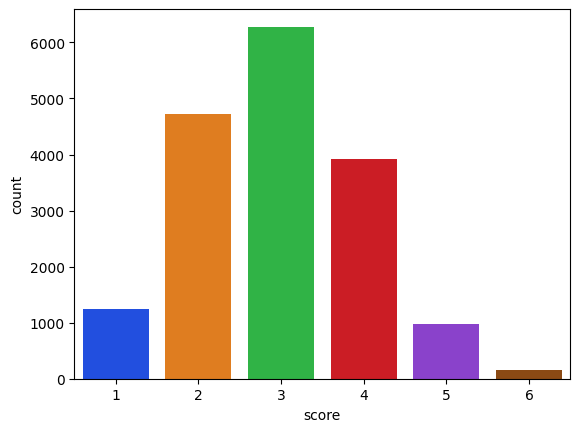

In [31]:
sns.countplot(data=df, x='score',palette='bright');
# TR = Kategorik verilerin her bir sınıfındaki gözlem sayısını görselleştirmek için kullanılır ve her kategorinin frekansını çubuklarla gösterir.
# EN = It is used to visualize the number of observations in each class of categorical data and shows the frequency of each category with bars.

# TR = (data=df) Veriyi df adlı DataFrame alacak.
# TR = (x='score') column değişkenindeki sütunları alıp yatay eksenine eşitleyecek

# EN = (data=df) Will take the data from the DataFrame named df.
# EN = (x='score') Will take the columns in the column variable and assign them to the x-axi

## <font color=#10e6e6> En çok Sayıdaki Kelimeleri Kap İçine Alma - Containing the Most Numbered Words 

In [32]:
#wc=wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    # TR = Kabımızın boyutunu belirttik.
    # EN = We specified the size of our container.
    
    mask=np.array(Image.open('cloud.png'))
    # TR = Image.open ile resmimizi açtık. np.array resmi diziye çevirdik ve mask değişkenine atadık.
    # EN = We opened our image with Image.open. We converted the np.array image to an array and assigned it to the mask variable.
    
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    # TR = Bir WordCloud tanımladık. Arka plan rengini bgcolor eşitledik. stopwords=STOPWORDS ile gereksiz kelimeleri atıp anahtar kelimeleri sakladık.
    # EN = We defined a WordCloud. We set the background color equal to bgcolor. We removed unnecessary words and kept keywords with stopwords=STOPWORDS

    # TR = mask=mask yukarıda tanımladığımız mask değişkenini kullan.
    # EN = mask=mask use the mask variable we defined above.
    
    wc.generate(''.join(data))
    # TR = .join(data) ile bütün sütündaki text alıp birleştirecek. 
    # EN = With .join(data) it will take the text in all columns and combine them.

    # TR = İçinde geçen tüm kelimeleri sayacak ve hafızada tutup generate ile tanımladığımız WordCloud oluşturduk ona eşitleyecek. 
    # EN = It will count all the words in it, keep it in memory and synchronize it with the WordCloud we created with generate.
    
    plt.imshow(wc)
    plt.axis('off')
    # TR = Bunla kod ile x ve y gözükmüyor.
    # EN = With this code, x and y do not appear.

In [33]:
olumlu = df[df['score'].isin([5, 6])]['full_text']
nötr = df[df['score'].isin([3, 4])]['full_text']
olumsuz = df[df['score'].isin([1, 2])]['full_text']
# TR = 5 ya da 6 score olanları olumlu, 3 ya da 4 score olan nötr ve 1 ya da 2 score olanları olumsuz değişkenine eşitledik.
# EN = We equated those with 5 or 6 score to positive, those with 3 or 4 score to neutral, and those with 1 or 2 score to negative.

In [34]:
wc(olumlu,'white')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ErenK\\OneDrive\\Belgeler\\Yapay Zeka\\Proje\\Natural Language Processing (NLP) 1\\laboratuvar\\cloud.png'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
wc(nötr,'white')

In [ ]:
wc(olumsuz,'white')

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [40]:
x = df['full_text']
y = df['score'].values

In [41]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(x)
x = vectorizer.transform(x)
x_test = vectorizer.transform(df_test['full_text'])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik. 
# EN = We trained our model.

In [44]:
x = x.toarray()  # Convert sparse matrix to dense
x_test = x_test.toarray()

In [39]:
x_test

array([[0.        , 0.0229158 , 0.03214887, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02156446, ..., 0.02787769, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.02142796, ..., 0.02770123, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18880245, 0.04414556, ..., 0.        , 0.10770003,
        0.        ]])

In [45]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=x_train.shape[1]))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 256 nöron var.
# Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 256 neurons.
# Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

model.add(BatchNormalization())
# TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
# EN = This layer is used to make the training process of the model more stable.

model.add(Dropout(0.5))
# TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır. Genelde 0.2 ile 0.5 arasında olur.
# EN = It is used to reduce overfitting in the deep learning model. It is generally between 0.2 and 0.5.

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))
# TR = Regresyon görevleri için lineer aktivasyon kullanıyoruz.
# EN = We use linear activation for regression tasks. 

model.compile(loss='mse', optimizer='adam', metrics=['mae'])  
# TR = Modelin kayıp fonksiyonu olarak 'mse' (ortalama kare hatası), optimizer olarak 'adam' ve performans metriği olarak 'mae' (ortalama mutlak hata) kullanılarak derlenmesini sağlar  
# EN = Compiles the model using 'mse' (mean squared error) as the loss function, 'adam' as the optimizer, and 'mae' (mean absolute error) as the performance metric

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 32 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 32.

Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 7.2721 - mae: 2.2782 - val_loss: 0.9428 - val_mae: 0.7806
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4098 - mae: 0.9450 - val_loss: 0.6211 - val_mae: 0.6367
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0417 - mae: 0.8096 - val_loss: 0.5800 - val_mae: 0.6160
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8533 - mae: 0.7347 - val_loss: 0.5536 - val_mae: 0.5986
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7583 - mae: 0.6895 - val_loss: 0.5348 - val_mae: 0.5896
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6790 - mae: 0.6529 - val_loss: 0.5181 - val_mae: 0.5802
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6534 - mae: 0.6433 - val_loss: 0.5078 - val_mae: 0.5724
Epoch 8/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6189 - mae: 0.6245 - val_loss: 0.5110 - val_mae: 0.5717
Epoch 9/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 417,285 (1.59 MB)

 Trainable params: 138,945 (542.75 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 277,892 (1.06 MB)

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.5064 - mae: 0.5738
Test doğruluğu: 0.5679


In [44]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
r2_score(y_test,pred) 
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul. 
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

0.5477825403213501

In [46]:
mean_squared_error(y_test,pred)**.5 
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.7063537801134147

In [47]:
mean_squared_error(y_test,pred)**.5 
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.7063537801134147

In [48]:
loss_f=pd.DataFrame(history.history)

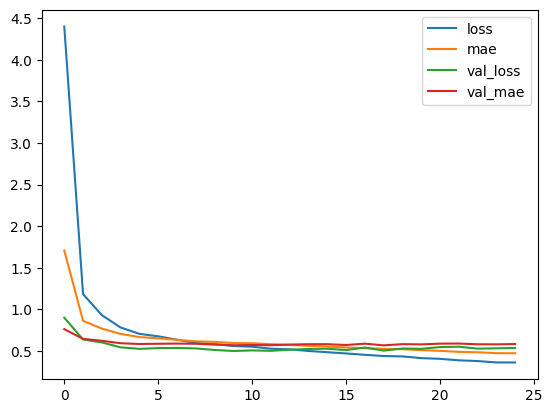

In [49]:
loss_f.plot();

In [47]:
with open('laboratuvar_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('laboratuvar_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)